# Arrests, Prison Sentencing, and Race in New York State

I analyzed the New York State 2018 arrest data to see if racial diparities exist. This analysis included adjusting for county population and the racial demographics of counties in which individuals were arrested or sentenced to prison.

I found that black people were arrested and sentenced to prison at a dispropotionately high rate compared to every other demographic group. This is true especially for counties with predominantly white populations (>50% white). Conversely, in counties where black people make up more than 10% of the total population, black people are arrested less and receive fewer prison sentences per arrest.

This suggest that the disproportionately high arrest and prison sentence rates for black people are due to racial biases against black people in counties with high white / low black populations.  

Do you want to also provide a bit more info about how the data was collected / how its organized? 

Love the Table of Contents!

## Table of contents
1. [Download and data setup](#1)
2. [County Demographics](#2)
    <br>[Plot1:%white vs %black population](#plot1)
3. [Arrests for different races](#3)
    <br>[Plot2: Arrest/population for each race](#plot2)
    <br>[Plot3: Population vs arrest/population for each race](#plot3)
    <br>[Plot4: all arrests vs city](#plot4)
    <br>[Plot5: Population vs arrest/population for each race log scale](#plot5)
    <br>[Plot6: Black arrest vs city](#plot6)
4. [County demographic and arrests for each race](#4)
    <br>4.1 [Population vs. % arrest for each race](#4.1)
    <br>[Plot7: Black arrest, county size, white demographic](#plot7)
    <br>[Plot8: Black arrest vs white demographic](#plot8)
    <br>[Plot9: Black arrest vs black demographic](#plot9)
    <br>4.2 [Summary by county demographic](#4.2)
    <br>4.2.1 [White](#4.2.1)
    <br>[Plot10: Race arrest percentage vs white demographic](#plot10)
    <br>[Plot11: Arrest/population vs white demographic](#plot11)
    <br>4.2.2 [Black](#4.2.2)
    <br>[Plot12: County distribution by black population](#plot12)
    <br>[Plot13: Arrest/population vs black demographic](#plot13)
    <br>4.3 [How unfair are the arrests?](#4.3)  
    <br>[Plot14: unfairness for each race](#plot14)
    <br>[Plot15: unfairness and percent white in each county](#plot15)
    <br>[Plot16: unfairness and white demographic](#plot16)
    <br>[Plot17: unfairness and black demographic](#plot17)
5. [Prison sentences vs. arrests](#5)
    <br>[Plot18: % prison sentence vs % arrest](#plot18)
    <br>[Plot19: Prison/arrest ratio for each race ](#plot19)
    <br>[Plot20: Prison/arrest ration vs white demographic](#plot20)
    <br>[Plot21: Prison/arrest ration and white demographic](#plot21)
    <br>[Plot22: Prison/arrest ration and black demographic](#plot22)
6. [Conclusion/Main Takeaways](#6)
    

## 1. <a id='1'>Download and data setup </a>

Dataset was obtained from here:

https://www.criminaljustice.ny.gov/crimnet/ojsa/comparison-population-arrests-prison-demographics.html
File was converted from pdf to excel with this: https://simplypdf.com/Excel

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# Import packages needed for ggplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotnine import *

In [3]:
xl2 = pd.ExcelFile('prison.xlsx') #Where can I find this file? Can you put it in the github repository?

sheetnames = xl2.sheet_names  # retrieve all sheet names

sheets = sheetnames[4:66] #Want to explain why 4:66?

# extract data from each sheet
data3 = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 2, nrows = 5)
    data3.append(countydata)
    
# Create new dataframe and add extracted data to it
prison_df = pd.DataFrame()
prison_df = prison_df.append(data3,True) 


In [4]:
# Rename columns
prison_df.columns = ['race','population','%population','arrest','%arrest','felonyarrest','%felony','prison','%prison']
# Preview resulting dataframe
prison_df.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00


In [5]:
# Get a list of county names from each sheet
counties = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 0,nrows = 5)
    countyname = countydata.columns[0]
    counties.append(countyname)

In [6]:
# Stack them so that it's in the same format as the rest of the data

countynames = counties
County = []
for c in countynames:
    countyname = c
    county = [[]] * 5 # Repeate 5 times
    county[0].append(c)
    County.append(county)
County = pd.DataFrame(County)
County = County.unstack()
# Make sure it is the right length (310)
len(County)

310

In [6]:
##There is an alternative to how you made the list of county names using a list comprehension. I think it's really just a matter of preferenece for how you do it, but I would do it like this because it's more concise: 

counties_reformat = [county for county in counties for i in range(5)]
County = pd.Series(counties_reformat, name = 'County')
len(County)

310

In [7]:
# Reset index
#If you create the Counties column with the list comprehension method, you don't need to do this. 
#County.reset_index(drop=True, inplace = True)

In [7]:
# Sort the county names so it matches the other table
#Why do you need to sort it? They should already be in the right order because you got them from the sheets in the same order. 
#Don't do more sorts and stuff than you need to. 

#County = County.sort_values()
#County.reset_index(drop=True, inplace = True)

# Add the county labels to the dataset
prison_df['County'] = County

# Remove brackets and commas 
#With the list comprehension method, there are no brackets to remove
#prison_df['County'] = prison_df['County'].str.join(', ')
#Pandas already read those as numbers without commas. If you check the prison_df.dtypes before running this, you'll see that they are already ints and floats, so these steps aren't necessary.
#prison_df = prison_df.replace(',','', regex=True)
prison_df.dtypes



race             object
population        int64
%population     float64
arrest            int64
%arrest         float64
felonyarrest      int64
%felony         float64
prison            int64
%prison         float64
County           object
dtype: object

In [8]:
prison_df.head(10)

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County
5,White,43781,0.94,755,0.91,234,0.91,16,0.94,Allegany County
6,Black,593,0.01,55,0.07,17,0.07,0,0.00,Allegany County
7,Hispanic,779,0.02,12,0.01,5,0.02,1,0.06,Allegany County
8,Asian,593,0.01,3,0.00,1,0.00,0,0.00,Allegany County
9,Other-Unknown,684,0.01,5,0.01,0,0.00,0,0.00,Allegany County


In [9]:
# Rename to df2 so that we have an unultered original
#This might be useful as you are working on the code, but since this is a more 'final version' report, I don't think makig copies as you go is really necessary. 
#Also, making copies by assigning to a new name doesn't work the same way in python as it does in R, for example. Any changes that you make to prison_df2 will also be made to prison_df because they are just two names that point to the same underlying structure.
prison_df2=prison_df

In [22]:
# Convert all the numeric columns to float
# These steps aren't necessary. Pandas already did this for you
#prison_df2['population'] = prison_df2['population'].astype(float)
#prison_df2['arrest'] = prison_df2['arrest'].astype(float)
#prison_df2['felonyarrest'] = prison_df2['felonyarrest'].astype(float)
#prison_df2['prison'] = prison_df2['prison'].astype(float)

In [10]:
# Calculate total prison counts 
#You should be able to do this a bit more efficiently with a .groupby()
#Actually, couldn't you just read in the totals from the spreadsheet in the first place? That would be more direct. 
#Obviously doing that you would have the totals in a row for the county, but extracting those would still be more direct than all this. 

#Your best bet might actually be to create another dataframe with the county names and all the totals directly from the original spreadsheet. Then if you want to get the totals into the main dataframe, you can merge by county name. Any of those options would be cleaner, I think. 

tprison = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['prison']
    tot = sum(toadd)
    mult = [[]] * 5 
    mult[0].append(tot)
    tprison.append(mult)
# Put it in a dataframe
tprison = pd.DataFrame(tprison)
# Put it all in one column
tprison = tprison.stack()
# Reset index
tprison.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totprison'] = tprison
# Remove brackets
prison_df2['totprison'] = prison_df2['totprison'].str[0]

In [11]:
prison_df2.head(10)

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totprison
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County,364
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County,364
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County,364
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County,364
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County,364
5,White,43781,0.94,755,0.91,234,0.91,16,0.94,Allegany County,17
6,Black,593,0.01,55,0.07,17,0.07,0,0.00,Allegany County,17
7,Hispanic,779,0.02,12,0.01,5,0.02,1,0.06,Allegany County,17
8,Asian,593,0.01,3,0.00,1,0.00,0,0.00,Allegany County,17
9,Other-Unknown,684,0.01,5,0.01,0,0.00,0,0.00,Allegany County,17


In [12]:
# Calculate total population 

tpop = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tpop.append(mult)
# Put it in a dataframe
tpop = pd.DataFrame(tpop)
# Put it all in one column
tpop = tpop.stack()
# Reset index
tpop.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totpopulation'] = tpop
# Remove brackets
prison_df2['totpopulation'] = prison_df2['totpopulation'].str[0]

In [13]:
# Calculate total felony arrests (do the same)
tfelony = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['felonyarrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tfelony.append(mult)
# Put it in a dataframe
tfelony = pd.DataFrame(tfelony)
# Put it all in one column
tfelony = tfelony.stack()
# Reset index
tfelony.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totfelony'] = tfelony
# Remove brackets
prison_df2['totfelony'] = prison_df2['totfelony'].str[0]

In [14]:
# Calculate total arrests (do the same)
tarrest = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['arrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tarrest.append(mult)
# Put it in a dataframe
tarrest = pd.DataFrame(tarrest)
# Put it all in one column
tarrest = tarrest.stack()
# Reset index
tarrest.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totarrest'] = tarrest
# Remove brackets
prison_df2['totarrest'] = prison_df2['totarrest'].str[0]

In [15]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totprison,totpopulation,totfelony,totarrest
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County,364,307117,2555,7132
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County,364,307117,2555,7132
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County,364,307117,2555,7132
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County,364,307117,2555,7132
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County,364,307117,2555,7132


In [15]:
# Label counties that are in NY city as "NY city" and label others as "others"
#I would recommend doing this a bit differently too. Generally, if it is possible to avoid looping through rows, you should try to avoid it. 
#I'll write up my alternative method in the next cell. 
data = []
for c in counties:
    if (c == 'Bronx County'or c=='Kings County'or c == 'New York County'or c == 'Queens County'or c == 'Richmond County'):
        mult = [[]] * 5
        mult[0].append('NY city')
        data.append(mult)     
    else:
        mult = [[]] * 5
        mult[0].append('Others')
        data.append(mult)  
        
data = pd.DataFrame(data)
data = data.unstack()

# Reset index
data.reset_index(drop=True, inplace = True)
# Sort the county names so it matches the other table

data = data.sort_values()
# Reset index again
data.reset_index(drop=True, inplace = True)

# Add the county labels to the dataset
prison_df2['city'] = data

# Remove brackets and commas 
prison_df2['city'] = prison_df['city'].str.join(', ')
prison_df2 = prison_df2.replace(',','', regex=True)
prison_df2['city'] = prison_df2['city'].str.replace(" ","")


In [16]:
NYC_counties = ['Bronx County', 'Kings County', 'New York County', 'Queens County', 'Richmond County']

prison_df2['city'] = np.where((prison_df2['County'].isin(NYC_counties)), 'NY city', 'Others' )

prison_df2.head(15)

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totprison,totpopulation,totfelony,totarrest,city
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County,364,307117,2555,7132,Others
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County,364,307117,2555,7132,Others
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County,364,307117,2555,7132,Others
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County,364,307117,2555,7132,Others
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County,364,307117,2555,7132,Others
5,White,43781,0.94,755,0.91,234,0.91,16,0.94,Allegany County,17,46430,257,830,Others
6,Black,593,0.01,55,0.07,17,0.07,0,0.00,Allegany County,17,46430,257,830,Others
7,Hispanic,779,0.02,12,0.01,5,0.02,1,0.06,Allegany County,17,46430,257,830,Others
8,Asian,593,0.01,3,0.00,1,0.00,0,0.00,Allegany County,17,46430,257,830,Others
9,Other-Unknown,684,0.01,5,0.01,0,0.00,0,0.00,Allegany County,17,46430,257,830,Others


In [17]:
# Add a column for % White of population for each county
perwhite = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "White")]
    toadd = rows['%population']
    tot = sum(toadd) # Using this sum funciton to strip unnecessary stuff
    mult = [[]] * 5
    mult[0].append(tot)
    perwhite.append(mult)
perwhite = pd.DataFrame(perwhite)

perwhite = perwhite.stack()
perwhite.reset_index(drop=True,inplace=True)
perwhite = perwhite.str[0]

# Add to prison_df2
prison_df2['perwhite'] = perwhite

In [18]:
# Add a column for % Black of population for each county
# You do this process twice, so it might be worth writing a function to add the column, then you can just call the function twice. That said, I think that there is a better way to calculate this in the first place. It's a bit drastic, but I think you should restructure your data so that you have a dataframe with only one row per county. Every measure that isn't 'per race' ie that you have to repeat 5 times to add to the main dataframe, you can just add to that county data dataframe. At the very end, you can then merge that dataframe to your current main dataframe using the county name. I think that would also make it clearer what data is 'per county' and what data is 'per race'. 
perblack = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "Black")]
    toadd = rows['%population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    perblack.append(mult)
perblack = pd.DataFrame(perblack)

perblack = perblack.stack()
perblack.reset_index(drop=True,inplace=True)
perblack = perblack.str[0]
prison_df2['perblack'] = perblack

In [19]:
# Calculate arrest/population
prison_df2['arrestperpopulation'] = prison_df2['arrest']/prison_df2['population']

In [20]:
# Take the log of the population
prison_df2['logpop'] = np.log10(prison_df2['population'])

In [21]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totprison,totpopulation,totfelony,totarrest,city,perwhite,perblack,arrestperpopulation,logpop
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County,364,307117,2555,7132,Others,0.72,0.13,0.014701,5.343474
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County,364,307117,2555,7132,Others,0.72,0.13,0.077242,4.594304
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County,364,307117,2555,7132,Others,0.72,0.13,0.033623,4.272700
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County,364,307117,2555,7132,Others,0.72,0.13,0.003634,4.314710
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County,364,307117,2555,7132,Others,0.72,0.13,0.018951,3.898451


For people who are reading through this in detail and are interested in how you structure the data, I think this might be a good place to explain what all your columns represent, as it isn't totally clear from the column names. 

## 2. <a id='2'>County Demographics </a>

In [22]:
# Quick look at county demographics
countydem = prison_df2[['County','race','city','%population']]
countydem = countydem.pivot(index = ['County','city'],columns='race', values='%population')
countydem = countydem.reset_index()

#### Plot1: <a id='plot1'>% white vs % black population </a>

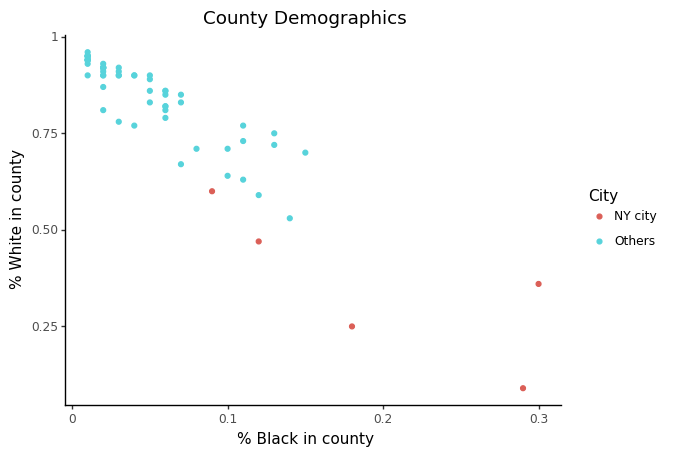

<ggplot: (-9223371954948560912)>

In [23]:
(ggplot(countydem, aes(x= 'Black', y='White', color='city')) 
 + geom_point()
 + ggtitle('County Demographics')
 + theme_classic()
 + ylab('% White in county')
 + xlab('% Black in county')
 + labs(color='City')
)


There is an overall inverse relationship between the proportion of white people and black people in counties, as expected. The racial demographics in NYC counties (Bronx, Kings, New York, Queens, Richmond) are comparable to other counties in NY State.

Are they? 3 of the NYC counties are clear outliers from the set of 'other' counties, and the other two are at an exterme end of the range of 'others'. Also, I think it would be really nice if you could add text labels to the NY city points so that we can tell which is which, especially since most americans will be familiar with the NYC counties. 

## 3. <a id='3'>Arrests for different races </a>

#### Plot2: <a id='plot2'>Arrest/population for each race </a>

In [24]:
# Create table to plot mean arrest/population
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index() #why do you need to reset index?
semsum = prison_df2.groupby('race').sem() # standard error of the mean
sem = semsum.loc[:,('arrestperpopulation')].tolist()
meanratio = mean.loc[:,('race','arrestperpopulation')]
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['arrestperpopulation'] - meanratio['sem']
meanratio['ymax'] = meanratio['arrestperpopulation'] + meanratio['sem']

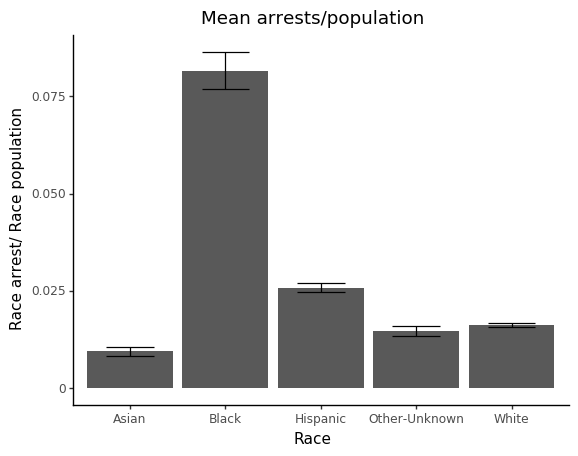

<ggplot: (-9223371954947961200)>

In [25]:
(ggplot(meanratio, aes(x='race',y='arrestperpopulation')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('Race arrest/ Race population') #This label isn't super clear. Maybe 'Arrests / Population by Race'?
 + ggtitle('Mean arrests/population')
)

On average, a higher proportion of the black population is arrested compared to other races.

^It might also be nice to add a line represening your 'null hypothesis', or what the number of arrests per goup would be if all races were arrested at equal rates. That way you can explicitly say that race x is disproportionately high and race y is disproportionately low. 

I would also try to reorder the columns so that 'Other-Unknown' is last (ie furthest to the right). Do you know what 'Other-Unknown' is likely to actually reflect based on how the data was collected? Does it include people who chose not to report? Are these self reported races in the first place? This would be useful information to know how to interpret that group, but also to know whether you should include them in the plots at all. 

#### Plot3: <a id='plot3'>Population vs arrest/population for each race </a>

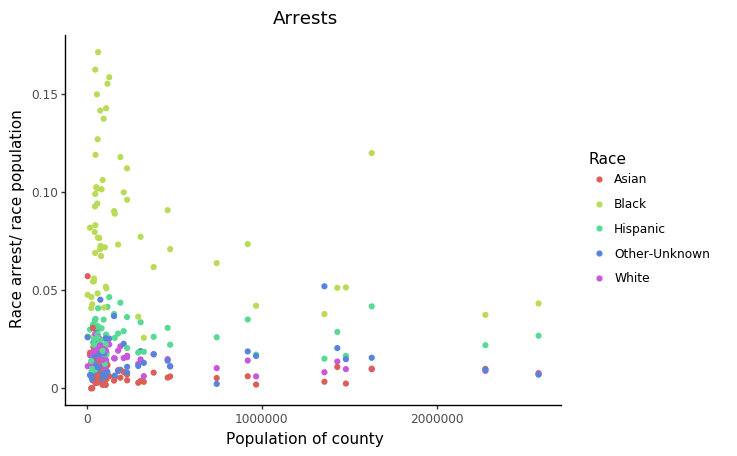

<ggplot: (-9223371954948594872)>

In [26]:
(ggplot(prison_df2, aes(x= 'totpopulation', y='arrestperpopulation',color = 'race')) 
 + geom_point()
 + ggtitle('Arrests')
 + ylab('Race arrest/ race population')
 + xlab('Population of county')
 + theme_classic()
 + labs(color='Race')
)

When looking by county, arrests/population for hispanic people and black people, are highest in less populated counties. 

#### Plot4: <a id='plot4'>Population vs arrest/population for each race log scale </a>

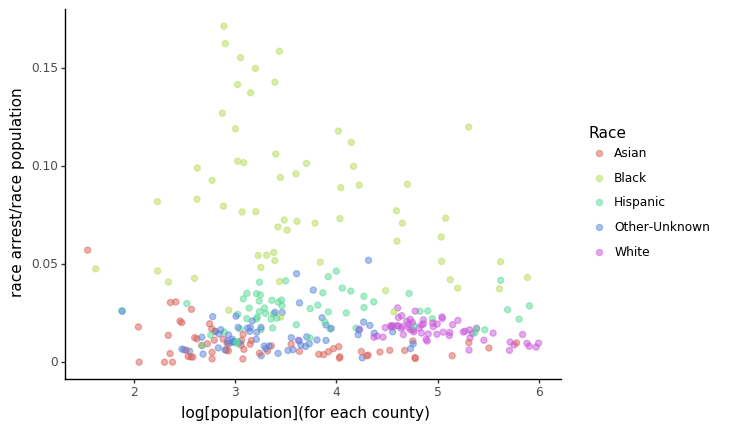

<ggplot: (-9223371954948746148)>

In [27]:
(ggplot(prison_df2, aes(x="logpop", y="arrestperpopulation", color='race')) 
 + geom_point(size=2,alpha=0.5) 
 + xlab('log[population](for each county)') #I think that there is a way to just set the x axis to a log scale. This would be preferable to calculating the log yourself first, because it will also give you log style tick marks. 
 + ylab('race arrest/race population')
 + theme_classic()
 + labs(color='Race')
)

I transformed the x axis to log scale to see the relationship between county population and arrests/race group population better. Black people are arrested at a higher percentage than other race accross the board.

!!! Be careful. "logpop" contains the population of each race per county, not the log of the total population of the county, so this plot is not actually just a log transformation of the one above. The x axis reflects something totally different. What clued me on to that is that I was wondering why white people are only ever arrested in counties with high populations, but that isn't actually the case (obviously), there is just a higher population of white people in every county. Avoiding confusion like this is another good reason to just change the x axis scale, rather than transforming the data yourself. 

If you were intending to plot it this way (with the log of county population per race) then I would make it SUPER clear that the x-axis is different, because it wasn't clear to me until I started at the plot for a long time and scrolled back up to where you creted the log transformed column. 

#### Plot5: <a id='plot5'>Arrests vs city </a>

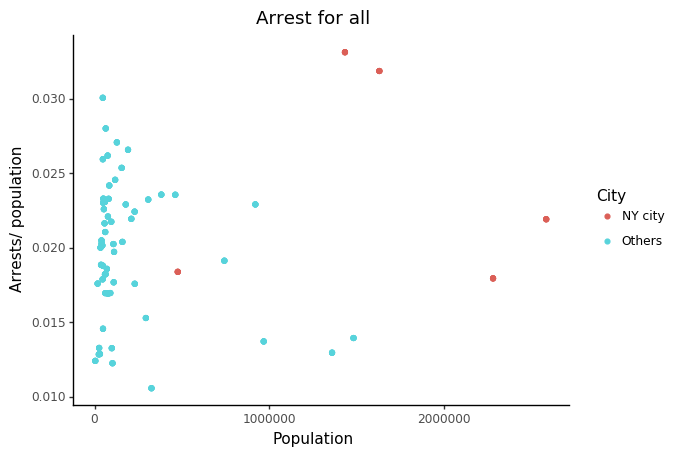

<ggplot: (-9223371954948947120)>

In [28]:
(ggplot(prison_df2, aes(x= 'totpopulation', y='totarrest/totpopulation',color = 'city')) 
 + geom_point()
 + ggtitle('Arrest for all')
 + ylab('Arrests/ population')
 + xlab('Population')
 + theme_classic()
 + labs(color='City')
)

Arrests overall do not seem to depend on the size of the county or the location (NY city vs other counties).

#### Plot6: <a id='plot6'>Black arrest vs city </a>

In [30]:
black = prison_df2[(prison_df2.race == 'Black')]

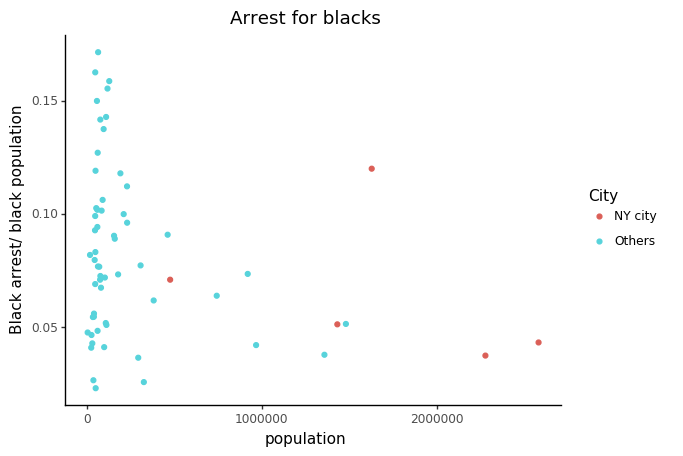

<ggplot: (-9223371954948670372)>

In [31]:
(ggplot(black, aes(x= 'totpopulation', y='arrestperpopulation',color = 'city')) 
 + geom_point()
 + ggtitle('Arrest for blacks') #careful with the language. I think "Arrests of Black People" would be more PC
 + ylab('Arrests of Black People/ black population')
 + xlab('population')
 + theme_classic()
 + labs(color='City')
)

Arrests/poppulation for black people also doesn't depend the location (NY city vs other counties), but is lower in higher populated counties.

Do you really need this plot? It's the same information as plot3, but by having the other races on plot3 as well, I think it makes the distinction in the pattern for arrests of balck people vs. county population more obvious. 

## 4. <a id='4'>County demographic and arrests for each race </a>

### 4.1 <a id='4.1'> Distribution of all counties</a>

In [31]:

# Add a column white demographic for each county

whitedems = []
whiteper = prison_df2['perwhite']

for w in whiteper:
    if w > 0.5:
        racedem = 'white >0.5'
    else:
        racedem = 'white <=0.5'
    whitedems.append(racedem)    


prison_df2['whitedems'] = whitedems



In [33]:
#alternative more concise implementation:

prison_df2['whitedems'] = np.where(prison_df2['perwhite'] > 0.5, 
"white >0.5", "white <=0.5")

#### Plot7: <a id='plot7'>Black arrest, county size, white demographic </a>

In [34]:
black = prison_df2[(prison_df2.race == 'Black')]

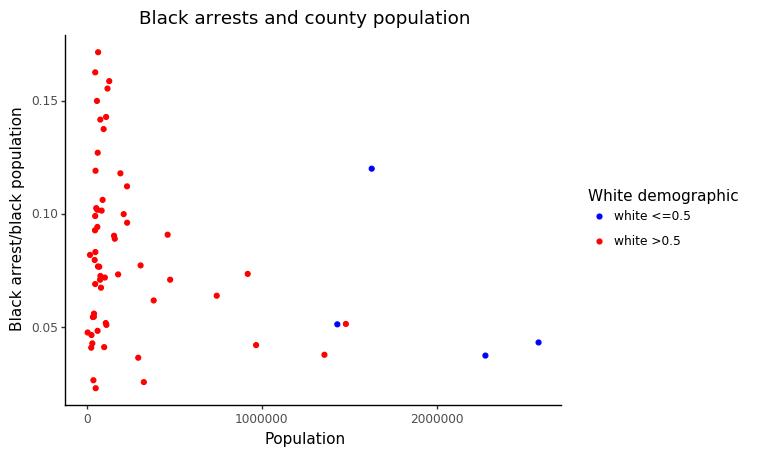

<ggplot: (-9223371954945691360)>

In [36]:
(ggplot(black, aes(x= 'totpopulation', y='arrestperpopulation',color = 'whitedems'))
 + geom_point()
 + scale_color_manual(values={'white >0.5':'red','white <=0.5':'blue'})
 + ggtitle('Arrests of Black People by county population')
 + ylab('Arrests of Black People / Black Population')
 + xlab('Population')
 + theme_classic()
 + labs(color='White demographic')
)

Black people are arrested more in small counties and those with low percentage of white population.

Coloring the points >50% white vs. <50% white might not be the best way to illustrate this relationship. Maybe instead you'd want to plot the "perwhite" on the x axis directly (which you do do in the next plot). Otherwise, you should at least color the points based on some other less arbitrary cutoff, like the mean 'perwhite' since very few counties have less than 50% white. 

#### Plot8: <a id='plot8'>Black arrest vs white demographic </a>

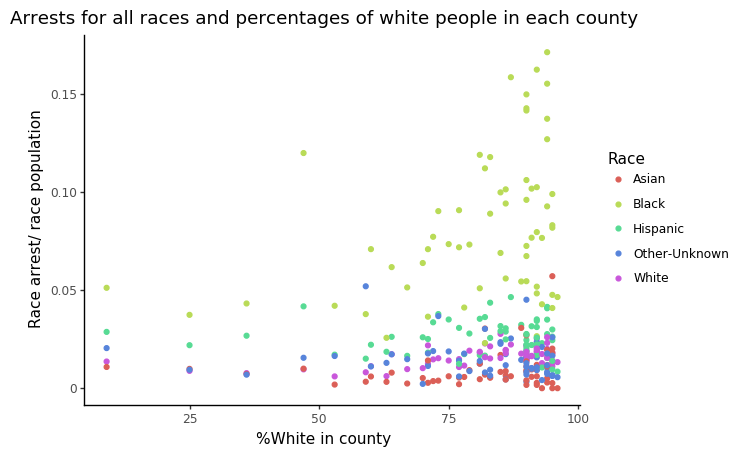

<ggplot: (-9223371954946666348)>

In [37]:
(ggplot(prison_df2, aes(x= 'perwhite*100', y='arrestperpopulation',color = 'race')) 
 + geom_point()
 + ggtitle('Arrests for all races and percentages of white people in each county')
 + ylab('Race arrest/ race population')
 + xlab('%White in county')
 + theme_classic()
 + labs(color='Race')
)

The more white people there are in the county, the greater the proportion of black and hispanic people who get arrested.

It's hard to say whether that relationship actually holds up for the hispanic population. Is there any way you can actually test that hypothesis?

#### Plot9: <a id='plot9'>Arrests of Black People vs Black Demographic </a>

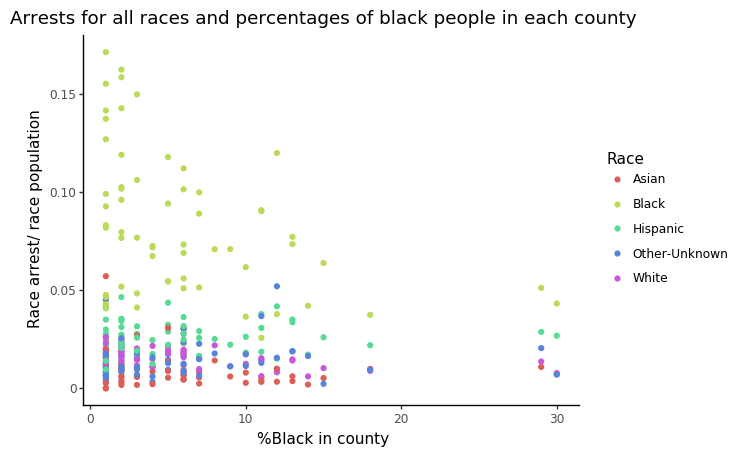

<ggplot: (-9223371954946519068)>

In [38]:
(ggplot(prison_df2, aes(x= 'perblack*100', y='arrestperpopulation',color = 'race')) 
 + geom_point()
 + ggtitle('Arrests for all races vs percentage of black people in each county')
 + ylab('Race arrest/ race population')
 + xlab('%Black in county')
 + theme_classic()
 + labs(color='Race')
)

On the conterary, the more the black people are in the county, the smaller the proportion of balck people who get arrested.

### 4.2 <a id='4.2'> Summary by county demographic </a>

 4.2.1 <a id='4.2.1'> White demographic and County demographic </a>

In [44]:
# Create a dataframe from groupby summary table
whitesum = prison_df2.groupby(['whitedems','race']).sum()
whitesum = whitesum.reset_index()
# Extract rows for low white counties
whiteminorows = whitesum[(whitesum.whitedems == 'white <=0.5')]
# Sum up the arrest counts
totarrestwhiteminority = sum(whiteminorows['arrest'])
# Do the same for high white counties
whitemajrows = whitesum[(whitesum.whitedems == 'white >0.5')]
totarrestwhitemajority = sum(whitemajrows['arrest'])
# Calculate percent arrest
whitemin = whiteminorows['arrest']/totarrestwhiteminority
whitemaj = whitemajrows['arrest']/totarrestwhitemajority
# Put whitemin in dataframe
arrestwhite = pd.DataFrame(whitemin)
# Reset index
whitemaj.reset_index(drop=True, inplace = True)
# Add whitemaj as a column
arrestwhite['whitemaj'] = whitemaj
# Add a column for race
race = ['Asian','Black','Hispanic','Unknown','White']
arrestwhite['race'] = race
# Rename column names
arrestwhite.columns = ['white <=0.5','white >0.5','race']
# Reshape dataframe
arrestwhite = pd.melt(arrestwhite, id_vars = ['race'], value_vars = ['white <=0.5','white >0.5'])
# Rename columns again
arrestwhite.columns = ['race','whitedem','arrestpercent']
# Convert fractions to percent
arrestwhite['arrestpercent'] = arrestwhite['arrestpercent']*100
# Round up decimal 
arrestwhite['arrestpercent'] = round(arrestwhite['arrestpercent'],1)

In [43]:
arrestwhite.head(10)

,race,whitedem,arrestpercent
0,Asian,white <=0.5,5.6
1,Black,white <=0.5,48.0
2,Hispanic,white <=0.5,34.6
3,Unknown,white <=0.5,0.9
4,White,white <=0.5,10.9
5,Asian,white >0.5,1.0
6,Black,white >0.5,29.4
7,Hispanic,white >0.5,13.6
8,Unknown,white >0.5,2.1
9,White,white >0.5,53.9


#### Plot10: <a id='plot10'>Race arrest percentage vs white demographic </a>

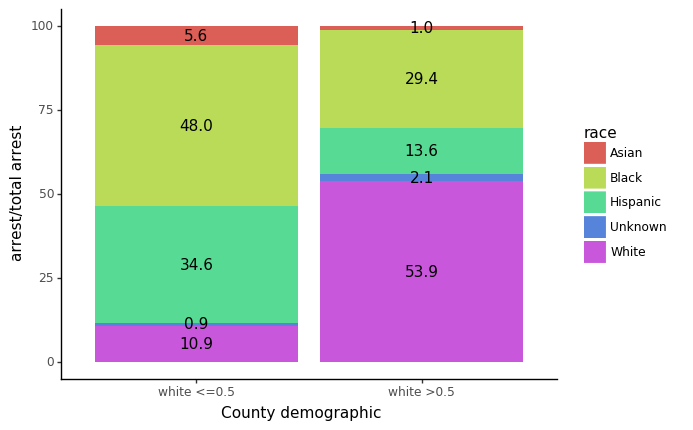

<ggplot: (-9223371954947849824)>

In [45]:
(ggplot(arrestwhite, aes(x='whitedem', y='arrestpercent', fill='race'))
 + geom_col() 
 + xlab('County demographic')
 + ylab('arrest/total arrest')
 + geom_text(aes(x='whitedem', y='arrestpercent', label='arrestpercent'),position = position_stack(vjust = 0.5))
 + labs(color='Race')
 + theme_classic()
 #title?
)

It is hard to tell how fair the arrests are by just looking at the percentage of arrest for each race/total arrest. At a glance, it does look like white people are getting arrested more in higher rate than other races as expected.

If this plot is so hard to interpret, is it really necessary to include? You don't want to dilute your really good visualizations with weaker ones. I also still think that 50% isn't the best cutoff for these groups. 

In [48]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()
# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
# extract row and convert to list
sem = whitesem.loc[:,('arrestperpopulation')].tolist()
whitearrpop = whitemean.loc[:,('whitedems','race','arrestperpopulation')]
# Add standard error column
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['arrestperpopulation'] - sem
whitearrpop['ymax'] = whitearrpop['arrestperpopulation'] + sem

#### Plot11: <a id='plot11'>Race arrest/population vs white demographic </a>

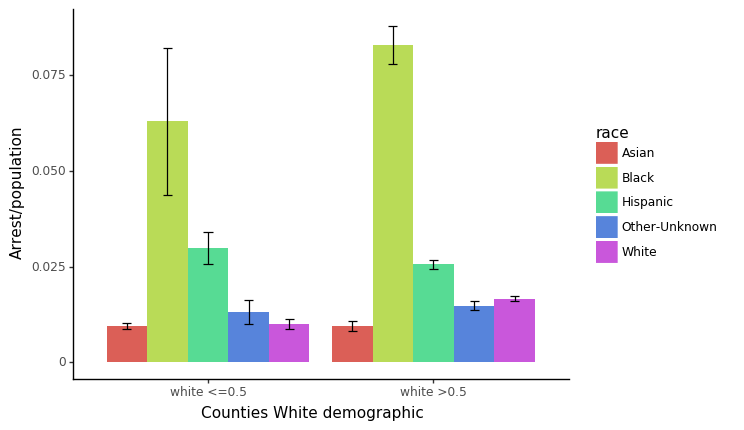

<ggplot: (-9223371954945698440)>

In [50]:
(ggplot(whitearrpop, aes(x='whitedems', y='arrestperpopulation', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Arrest/population")
 + xlab("Counties White demographic")
 + labs(color='Race')
 #title?
)

However, when you compare the raw numbers of arrest/population, you can see that not only black arrests are disproportionately high but also that it get's worse when white people are the majority.

Move 'Other-Unknown' to the far right of each group or remove it entirely. Can you perform some statistical test to show whether there is actually a difference in Arrests of Balck People / Black population in the two groups? 

 4.2.2 <a id='4.2.2'> Black demographic and arrest demographic </a>

#### Plot12: <a id='plot12'>County distribution by black population </a>

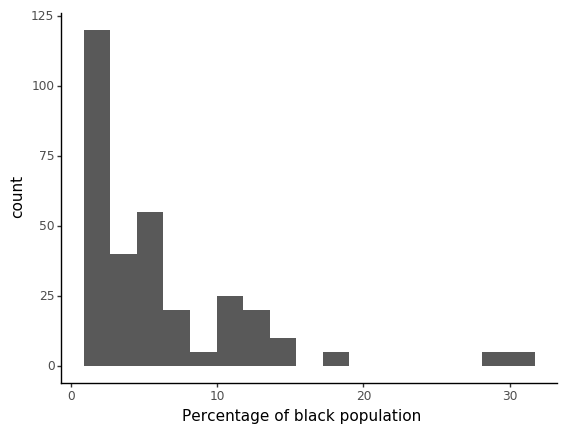

<ggplot: (-9223371954946585484)>

In [51]:
# Quick look at the distribution of counties/black demographic
(ggplot(prison_df2,aes(x='perblack*100')) 
 + geom_histogram()
 + theme_classic()
 + xlab('Percentage of black population')
 #title?
)

The distribution of counties by black population shows that, in all counties, black people account for less than 40% of the total population. For the following figures dividing the counties by black population, I will be using 10% as the cuttoff. 

Why 10%? That seems arbitrary. Use the median of the distribution or some specified percentile of the distribution. This is a similar issue to arbitrarily choosing 50% for white populations. 

In [52]:
# Create a column for black demographic for each county
#See above for an alternative implementation of this using np.where()
blackdems = []
blackper = prison_df2['perblack']

for w in blackper:
    if w > 0.1:
        racedem = 'black >0.1'
    else:
        racedem = 'black <=0.1'
    blackdems.append(racedem)    


prison_df2['blackdems'] = blackdems

In [53]:
# Get the mean with groupby
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()
# Calculate standard error (sem)
blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
# extract row and convert to list
sem = blacksem.loc[:,('arrestperpopulation')].tolist()
blackarrpop = blackmean.loc[:,('blackdems','race','arrestperpopulation')]
blackarrpop['sem'] = sem
# get ymin and ymax for errorbars
blackarrpop['ymin'] = blackarrpop['arrestperpopulation'] - sem
blackarrpop['ymax'] = blackarrpop['arrestperpopulation'] + sem

#### Plot13: <a id='plot13'>Race arrest/population vs black demographic </a>

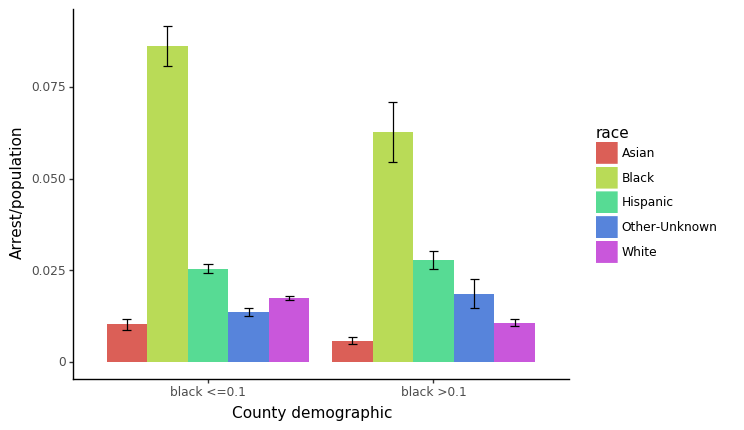

<ggplot: (-9223371954945018248)>

In [54]:
(ggplot(blackarrpop, aes(x='blackdems', y='arrestperpopulation', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 + ylab('Arrest/population')
 + xlab('County demographic')
 # dodge puts it at the right place
 + theme_classic()
 + labs(color='Race')
 #title?
)

Black people get arrested less in counties with higher black population.

Can you back it up with stats?

### 4.3 <a id='4.2'> How unfair are the arrests? </a>

The "Unfairness factor" is the %Arrest/%population for each race. If everyone is arrested at the same rate, unfairness factor should be 1 for all races.
Can you also explain the interpretation of a score > 1 or < 1?

Did you come up with the "Unfairness factor"? If not, where did it come from? Can you cite it?

In [56]:
# re-calculate % population because the original data is missing decimal points
#^Why don't you just do this at the very begining and work with the more accurate numbers throughout?
recalcpop = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
#You should be able to do this with a .groupby('County') instead of using loops. 
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['population']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['population']
        totr = sum(rpop)
        percent = totr/tot
        recalcpop.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%pop'] = recalcpop

In [57]:
# re-calculate % arrest to be exact
recalcarrest = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['arrest']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['arrest']
        totr = sum(rpop)
        percent = totr/tot
        recalcarrest.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%arrest'] = recalcarrest

In [58]:
# Calculate an unfair factor and name it 'ratio'
prison_df2['ratio'] = (prison_df2['recalc%arrest']+0.001)/(prison_df2['recalc%pop']+0.001) #Why + 0.001? 

In [60]:
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum.loc[:,('ratio')].tolist()
meanratio = mean.loc[:,('race','ratio')]
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['ratio'] - meanratio['sem']
meanratio['ymax'] = meanratio['ratio'] + meanratio['sem']





#### Plot14: <a id='plot14'>Unfairness for each race </a>

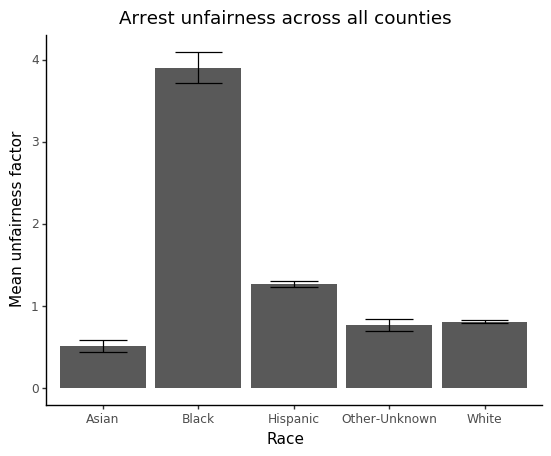

<ggplot: (-9223371954944540660)>

In [61]:
(ggplot(meanratio, aes(x='race',y='ratio')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('Mean unfairness factor')
 + ggtitle('Arrest unfairness across all counties')
)

Across all NY State counties, black people are arrested at unfairly high rates, on average.

Since you are plotting a mean not a total, it might be better to show a boxplot than a barplot. 
You also might want to put a horizontal indicator line at unfairness score = 1. It looks like hispanic people are also above 1. Can you test whether they are statistically significantly different from 1?

#### Plot15: <a id='plot15'>Unfairness and percent white in county </a>

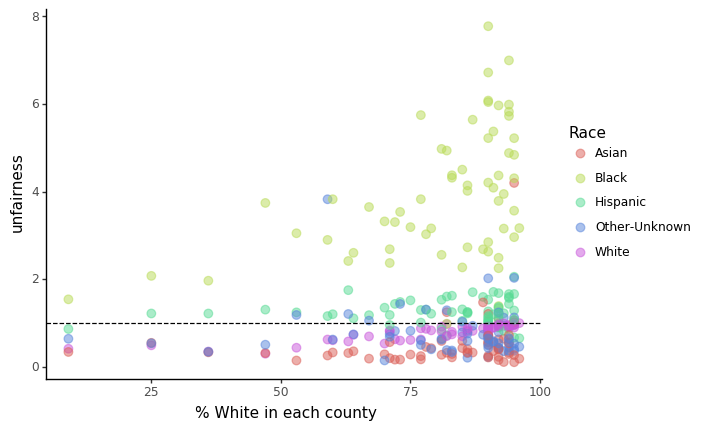

<ggplot: (-9223371954944044184)>

In [62]:
# Plot the arrest per population for each race
(ggplot(prison_df2, aes(x="perwhite*100", y="ratio", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('unfairness')
 + geom_hline(yintercept=1,linetype='dashed')
 + theme_classic()
 + labs(color='Race')
)

Unfairness factor values for black people gets worse as the percentages of white people gets higher in the counties.

In [50]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()

# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,('ratio')].tolist()
whitearrpop = whitemean.loc[:,('whitedems','race','ratio')]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['ratio'] - sem
whitearrpop['ymax'] = whitearrpop['ratio'] + sem

#### Plot16: <a id='plot16'>Unfairness and white demographic </a>

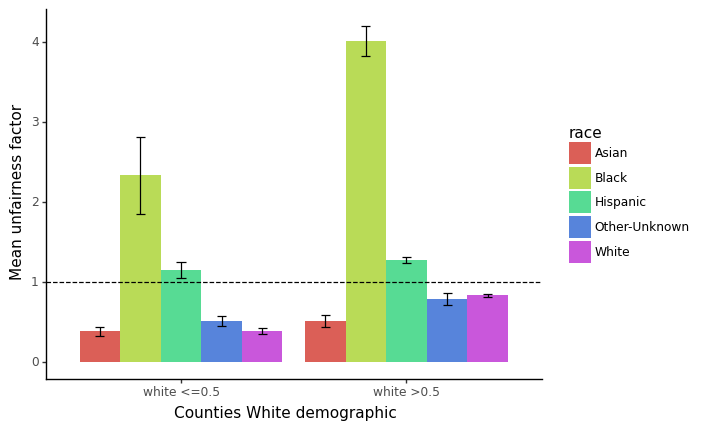

<ggplot: (7020125201)>

In [51]:
(ggplot(whitearrpop, aes(x='whitedems', y='ratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Mean unfairness factor")
 + xlab("Counties White demographic")
 + geom_hline(yintercept=1,linetype='dashed')
 + labs(color='Race')
)

Unfairness factor values for black people are worse in counties with a high percenage of white people.

Again, why 50% as the cutoff? Move other to the end or remove it entirely. I like the horizontal line! Can you add statistical tests?

In [65]:
# Get the mean with groupby
#Since you do this same type of thing many times, you might want to write a function to do it which just takes the prison_df2 as input along with the columns to groupby and returns the final dataframe with + - sem. Doing that will make the code easier to read, more concise, and less prone to typo-related errors. 
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()

# Calculate standard error (sem)
blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,('ratio')].tolist()
blackarrpop = blackmean.loc[:,('blackdems','race','ratio')]
blackarrpop['sem'] = sem
# get ymin and ymax for errorbars
blackarrpop['ymin'] = blackarrpop['ratio'] - sem
blackarrpop['ymax'] = blackarrpop['ratio'] + sem

#### Plot17: <a id='plot17'>Unfairness and black demographic </a>

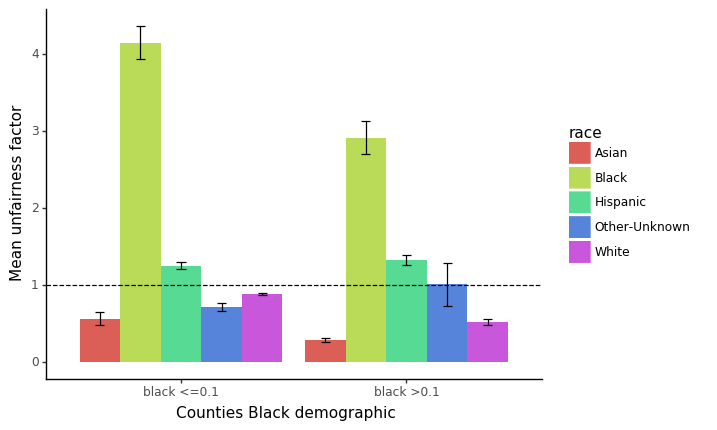

<ggplot: (-9223371954944361536)>

In [66]:
(ggplot(blackarrpop, aes(x='blackdems', y='ratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Mean unfairness factor")
 + xlab("Counties Black demographic")
 + geom_hline(yintercept=1,linetype='dashed')
 + labs(color='Race')
 #title?
)

Black people are arrested less unfairly when there are more black people in the counties.

## 5. <a id='5'>Prison sentences for each race </a>

#### Plot18: <a id='plot18'>% Prison sentence vs % arrest </a>

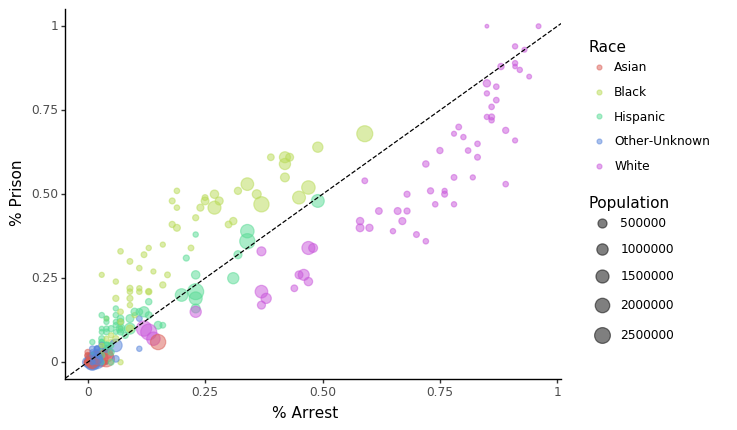

<ggplot: (-9223371954945670728)>

In [67]:
(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='totpopulation')) 
 + geom_point(alpha=0.5) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
 + xlab("% Arrest")
 + ylab("% Prison")
 + labs(color='Race',size='Population')
 + theme_classic()
)

If everyone arrested were sentenced to prison with equal probablility, regardless of race, all points should be on the diagonal line. However, most points representing black populations are above and most white populations are below the diagonal line, indicating that black arrestees are disproportionately sentenced to prison and white arrestees are treated favorably.

What are the denominators of %arrested and %prison? Don't you have to be arrested in order to go to prison? Then why are there any points above the diagonal? Could you explain what the axes represent in more detail to clear this up?

In [68]:
# re-calculate % prison to be exact
#You could write a function to do this, since you do a similar thing many times. 
recalcprison = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['prison']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['prison']
        totr = sum(rpop)
        percent = totr/tot
        recalcprison.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%prison'] = recalcprison

In [69]:
prison_df2['prisonratio'] = (prison_df2['recalc%prison']+0.01)/(prison_df2['recalc%arrest']+0.01)
# Added 0.01 to adjust for the very small numbers
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum.loc[:,('prisonratio')].tolist()
meanratio = mean.loc[:,('race','prisonratio')]  
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['prisonratio'] - meanratio['sem']
meanratio['ymax'] = meanratio['prisonratio'] + meanratio['sem']

#### Plot19: <a id='plot19'>Prison/arrest ratio for each race </a>

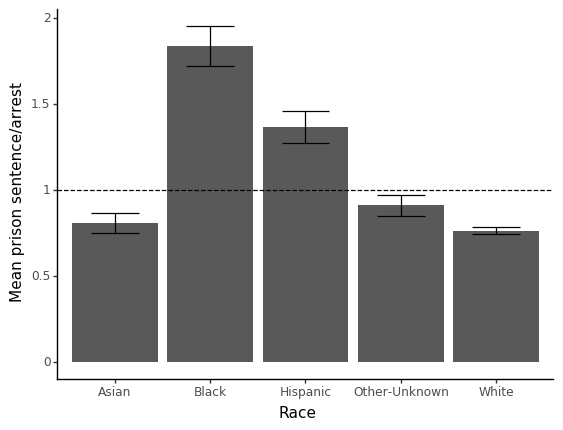

<ggplot: (-9223371954947857492)>

In [70]:
(ggplot(meanratio, aes(x='race',y='prisonratio')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('Mean prison sentence/arrest')
 + geom_hline(yintercept=1, linetype='dashed')
)

As seen in the scatter plot ([plot18](#plot18)), black people are sentenced to prison at disproportionately high rates. While it was not as obvious in the scatter plot, hispanic people are also sentenced to prison more than other races. 

How can the mean sentence / arrest reach 2? That doesn't make sense because you can't sentence 2 people for one arrest? I'm not sure what I'm missing here, but make sure your axes labels are accurate and that the calulations are too, because this seems very strage. 

In [71]:
prison_df2[(prison_df2.prisonratio > 4)] #what is the purpose of this table?

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,...,perblack,arrestperpopulation,logpop,whitedems,blackdems,recalc%pop,recalc%arrest,ratio,recalc%prison,prisonratio
76,Black,867,0.02,23,0.03,12,0.06,9,0.26,Essex County,...,0.02,0.026528,2.938019,white >0.5,black <=0.1,0.023244,0.032717,1.390735,0.257143,6.253794
286,Black,1799,0.03,87,0.07,61,0.15,39,0.33,Washington County,...,0.03,0.048360,3.255031,white >0.5,black <=0.1,0.029397,0.067547,2.255054,0.327731,4.355203


#### Plot20: <a id='plot20'>Prison/arrest ratio vs white demographic </a>

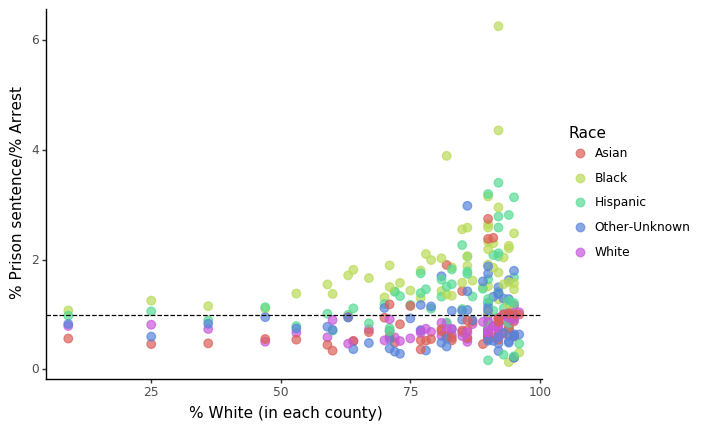

<ggplot: (-9223371954946525868)>

In [72]:
(ggplot(prison_df2, aes(x="perwhite*100", y="prisonratio", color='race')) 
 + geom_point(size=3,alpha=0.7) 
 + xlab('% White (in each county)')
 + ylab('% Prison sentence/% Arrest')
 + theme_classic()
 + geom_hline(yintercept=1,linetype='dashed')
 + labs(color='Race')
 #title
)

The higher the proportion of white people in a county, the greater the proportion of black and hispanic arrestees who are sentenced to prison. 

What does the horizontal line represent? How can there be groups where %sentenced is higher than %arrested? Is it because %sentenced = sentences / arrests * 100? Because if that is the case, I don't see why a horizontal line at 1 is meaningful. And if that is the case does it make sense to divide by arrests again?

In [78]:
# Get the mean with groupby
# Use a function
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()
# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,('prisonratio')].tolist()
whitearrpop = whitemean.loc[:,('whitedems','race','prisonratio')]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['prisonratio'] - sem
whitearrpop['ymax'] = whitearrpop['prisonratio'] + sem

#### Plot21: <a id='plot21'>Prison/arrest ratio and white demographic </a>

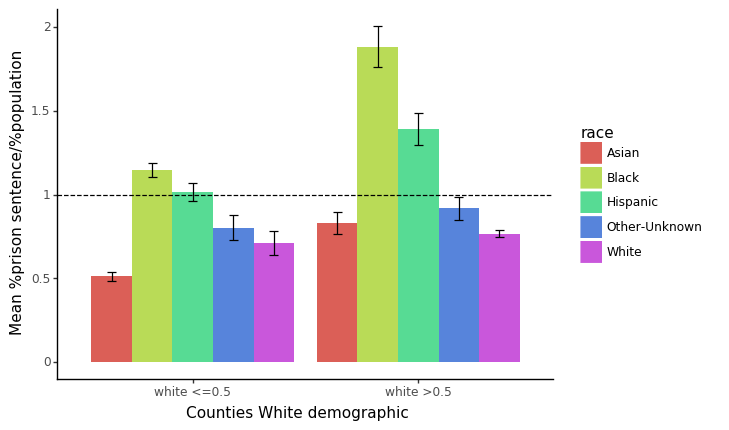

<ggplot: (-9223371954944161424)>

In [75]:
(ggplot(whitearrpop, aes(x='whitedems', y='prisonratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Mean %prison sentence/%population")
 + xlab("Counties White demographic")
 + geom_hline(yintercept=1,linetype='dashed')
 + labs(color='Race')
)

A greater proportion of black and hispanic arrestees are sentenced to prison in counties with high white populations.

In [79]:
# Get the mean with groupby
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()
# Calculate standard error (sem)
blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,('prisonratio')].tolist()
blackarrpop = blackmean.loc[:,('blackdems','race','prisonratio')]
blackarrpop['sem'] = sem
# get ymin and ymax for errorbars
blackarrpop['ymin'] = blackarrpop['prisonratio'] - sem
blackarrpop['ymax'] = blackarrpop['prisonratio'] + sem

#### Plot22: <a id='plot22'>Prison/arrest ratio and black demographic </a>

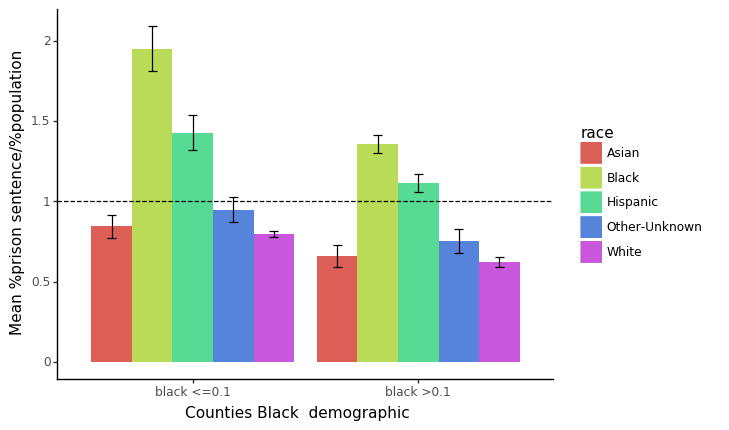

<ggplot: (-9223371954943742800)>

In [80]:
(ggplot(blackarrpop, aes(x='blackdems', y='prisonratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Mean %prison sentence/%population")
 + xlab("Counties Black  demographic")
 + geom_hline(yintercept=1,linetype='dashed')
 + labs(color='Race')
 #title
)

A smaller proportion of black and hispanic arrestees are sentenced to prison in counties with high black populations.

## 6. <a id='6'>Conclusion/Main Takaways </a>

1. Substantially more black people/(race)population are arrested in counties with a higher proportion of white people (see ([#3](#3),[#4.2.1](#4.2.1),[#4.3](#4.3)). The overall population size or location (NYC/non-NYC) of the county doesn't seem to matter (see [#4.1](#4.1)).

^It looks to me that overall population size and location **do** matter from those plots. 

2. The more black people there are in the community, the fewer black people get arrested (/black population) (see [#4.2.1](#4.2.1))


3. More black arrestees are sentenced to prison compared to other races (see [#5](#5). This effect is amplified in counties with high white demographic (see [#5](#5)).

These data describe arrests and convictions that happened in calendar year 2018 and were deidentifed for anonymity by New York State. As a result, we don't know which arrests represent repeat offenders, or how many of the arrests during 2018 led to prison sentences within that same year. Regardless of these factors, the data indicate that racial disparities have an observable effect on crime and the criminal justice system in New York State, from police apprehension all the way through the court system.